# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [133]:
# Import libraries necessary for this project
from __future__ import division
from collections import Counter
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [136]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60, 34, 100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   8590  3045     7854      96              4095           225
1   1502  1979     2262     425               483           395
2  11594  7779    12144    3252              8035          3029

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first observation's (index 60) spending on Detergents_Paper is above 75% of the data and below 25% on Frozen. This may very well be a **hotel**, where for every customer they need to spend a lot on washing bed sheets and replacing toilet paper, and relatively less on food.

The second observation's (index 34) spending is well below 50% on every feature, and most on Grocery. This could be a small **grocery store**.

The third observation's (index 100) spending is at around 75% in every feature while with feature proportions similar to the second. This could be a **supermarket**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [137]:
from sklearn import cross_validation
from sklearn import tree
from sklearn.metrics import mean_squared_error

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis = 1)
DtrPpr =  data.drop(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicatessen'], axis = 1)
DtrPpr = DtrPpr.Detergents_Paper.values

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data, DtrPpr, test_size = 0.25, random_state = 1)

# TODO: Create a decision tree regressor and fit it to the training set
reg = tree.DecisionTreeRegressor(random_state = 0)
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = reg.score(X_test, y_test)
print "R^2: {}".format(score)

R^2: 0.763468783139


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attemtped to predict the Detergents_Paper feature, and the prediction score ($R^2$) turned out to be 0.763 (rounded to the third decimal place). I believe this feature is irrelevent for identifying a specific customer since $R^2$ is quite high, which means we can predict this feature using other features, therefore it doesn't provide much extra information about the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

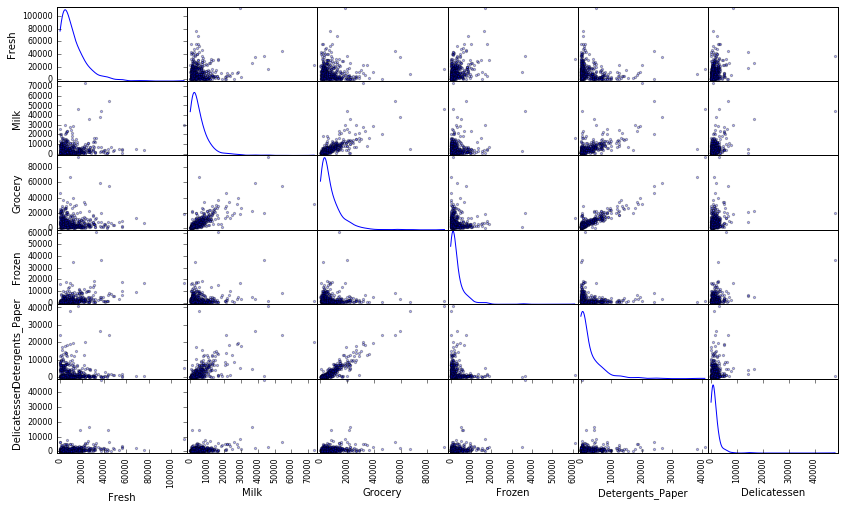

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There seems to be a linear relationship between Grocery and Detergents_Paper. This confirms what I suspected earlier about the relevance of the feature of Detergents_Paper. The data appears to be positive-skewed for all features.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

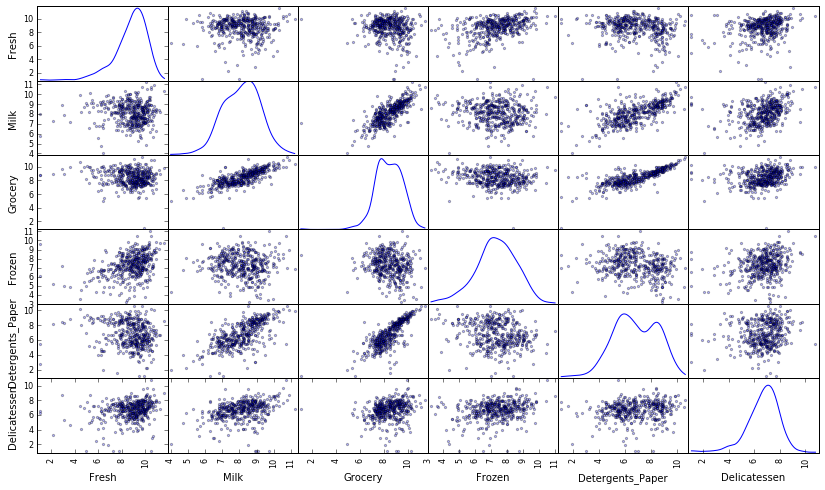

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [55]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.058354  8.021256  8.968778  4.564348          8.317522      5.416100
1  7.314553  7.590347  7.724005  6.052089          6.180017      5.978886
2  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [39]:
from collections import defaultdict

index_count = defaultdict(int)

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    for index in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values:
        index_count[index] += 1

multi_presence = {key:value for key, value in index_count.items() if value >= 2}
print "As outliers for more than one feature: {}".format(multi_presence)

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [128, 65, 154, 75, 66]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

As outliers for more than one feature: {128: 2, 65: 2, 154: 3, 75: 2, 66: 2}


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes. The indices of them are: {128, 65, 154, 75, 66}. We can consider removing them from the dataset as they only take up 1.1% of the dataset and aren't worth predicting.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

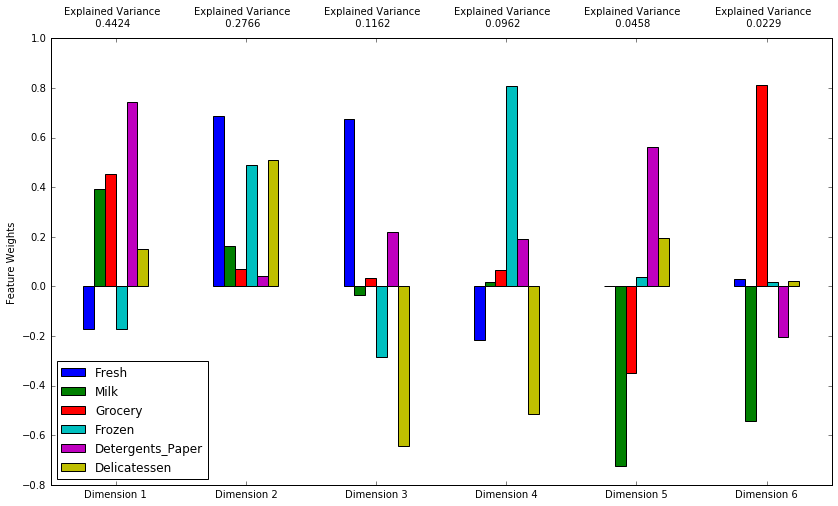

In [56]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and the second principle components explain $0.4424 + 0.2766 = 0.719$ of the variance. And the first four principle components explain $0.4424 + 0.2766 + 0.1162 + 0.0962 = 0.9314$ of the variance.

From the chart we can see that the first two dimensions tend to be complimentary to each other. Features that are assigned more weights to in the Dimension 1 ('Milk', 'Grocery', 'Detergents_Paper') are assigned to very small weights in Dimension 2 whereas those assigned very small (positive or negative) weights in Dimension 1 are assigned to very large weights in Dimension 2 ('Fresh', 'Frozen', 'Delicatessen'). The first two dimensions together explain 71.9% of the variance. As to how we should read this, take Dimension 1 for example, it can be seen as that we can specify a customer simply by looking at the sum (weighted) of how much they spend on 'Milk', 'Grocery' and 'Detergents_Paper'.

Without losing too much generality, Dimension 3 can be seens as (Fresh - Delicatessen). The difference between the two features (along with other features taking bits of the weighted sum) explains 11.62% of the variance. Similarly, Dimension 4 can be seens as (Frozen - Delicatessen) which explains 9.62% of the variance.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [57]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.5699      -1.6623       2.1600      -1.3119       0.4088   
1      -0.6284      -2.0905      -0.2933      -0.5224       0.1108   
2       2.3702       1.7971      -0.1871       0.3020       0.5955   

   Dimension 6  
0       0.1069  
1      -0.2518  
2      -0.0546

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [91]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [92]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.5699      -1.6623
1      -0.6284      -2.0905
2       2.3702       1.7971

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means:** K-Means is simple. For the most part, you only need to set the number clusters you're looking for and it can return you a good result. Yet it is a powerful clustering algorithm and generally cheap to compute since you only need to compute the mean for each cluster. 

**Gaussian Mixture Model:** GMM can still work well on cases where you don't have clear boundaries between clusters. Also, the fact that it's model-based means that when the likelihood is high, we can say a lot about the data using the model.

For the wholesale customer data it seems that simple K-Means should do the work because if I can easily pick out samples that are obviously distinct simply by eyeballing the clusters should be quite different in nature and should be picked up by K-Means easily.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import operator

# TODO: Apply your clustering algorithm of choice to the reduced data
scores = {}

for n in range(2, 11):
    clusterer = KMeans(n_clusters = n)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    labels = clusterer.labels_
    score = silhouette_score(reduced_data, labels, metric='euclidean')
    scores[n] = score
    
    print "Silhouette score with n = {}: {}".format(n, score)

max_key = max(scores.keys(), key=(lambda k: scores[k])) 

clusterer = KMeans(n_clusters = max_key)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
labels = clusterer.labels_
score = silhouette_score(reduced_data, labels, metric='euclidean')
        
print "\nSample Clusters: {}\n".format(sample_preds)
print "Cluster centers: \n{}\n".format(centers)
print "Silhouette score (max) with n = {}: {}".format(max_key, score)

Silhouette score with n = 2: 0.419166083203
Silhouette score with n = 3: 0.393473191482
Silhouette score with n = 4: 0.330321550765
Silhouette score with n = 5: 0.350068590169
Silhouette score with n = 6: 0.359653257345
Silhouette score with n = 7: 0.364832512065
Silhouette score with n = 8: 0.358225777992
Silhouette score with n = 9: 0.352389674896
Silhouette score with n = 10: 0.34969817058

Sample Clusters: [0 1 0]

Cluster centers: 
[[ 2.21426954 -0.24162188]
 [-1.50435106  0.16415532]]

Silhouette score (max) with n = 2: 0.419166083203


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I have tried `n_clusters = range(2, 11)` and it turns out that `n_clusters = 2` has the best silhouette score, $0.419$.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

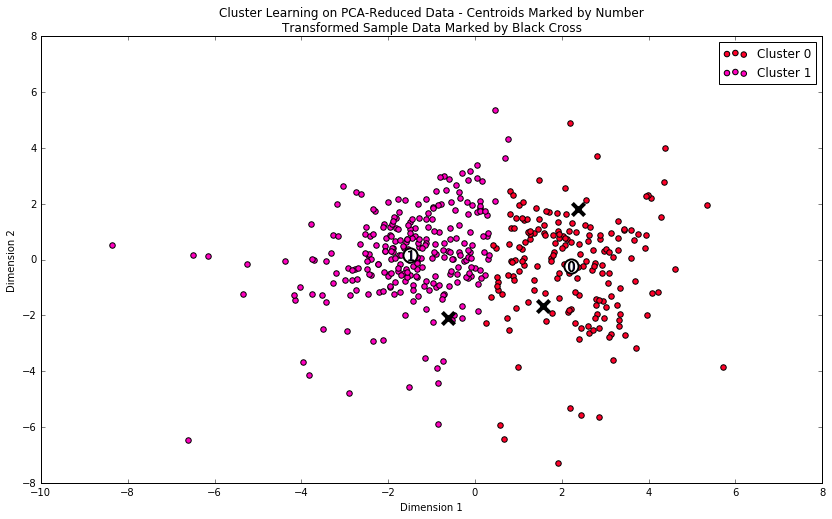

In [159]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [160]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3570.0  7749.0  12463.0   900.0            4567.0         966.0
Segment 1  8994.0  1909.0   2366.0  2081.0             290.0         681.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 centers at where Milk, Grocery and Detergents_Paper are well above 75% of the population, and Fresh and Frozen at quite low level near 25%. From this we can imagine Segment 0 represents establishments that spend high on Milk, Grocery and Detergents_Paper, and low on Fresh and Frozen. Segement 0 therefore may represents establishments such as hotels or cafes, where you can imagine them spend more on detergents and less on fresh products.

Segment 1 ceteres at relatively higher on Fresh and Frozen well above 50% and low on Detergents_Paper around 25%. We can imagine them to be businesses like small supermarkets or loal convenient stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [210]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
display(samples.astype('float').div(samples.sum(axis = 1).astype('float'), axis='index') * 100)
display(true_centers.astype('float').div(true_centers.sum(axis = 1).astype('float'), axis='index') * 100)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  35.933905  12.737921  32.855051  0.401590         17.130307      0.941226
1  21.317059  28.086858  32.103321  6.031791          6.854953      5.606018
2  25.296184  16.972487  26.496193  7.095324         17.531037      6.608775

Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
Segment 0  11.815324  25.646202  41.247725   2.978653         15.115009   
Segment 1  55.106917  11.696587  14.496661  12.750444          1.776852   

           Delicatessen  
Segment 0      3.197088  
Segment 1      4.172538

**Answer:** 

**Point 0:** Very high on Grocery and Detergents_Paper, extremely low on Frozen. Though the fact that it is high on Fresh and somewhere in between for Milk makes it slightly ambiguous. But it is still quite clear that it should be put in segment 0.

**Point 1:** The values of point 1 are relatively low on every feature. Although its spend on Milk and Grocery are very close to segment 1 it's still hard to say which segment it belongs to. To further look into this, we may take a look at the proportions of its spend on each feature relative to its total spend, in order to understand it's business nature. With this approach, we may first look at Fresh, Frozen and Detergents_Paper, since the proportions of which are very different between segment 0 and segment 1. And for Fresh and Frozen, it's somewhere in between the two segments. On the other hand it's quite clear that it's closer to segment 1 in regard to Detergents_Paper. It's quite unclear which segment we should put this point to. We may just put it in segment 1 for now, but it may very well belong to segment 0.

**Point 2:** Very high on Milk, Grocery and Detergents_Paper. Though not really low on any feature and high on Fresh, it still seems more close to segment 0 than to segment 1. 

Looking back at the predictions and it seems that the predictions are consistent with our preliminary analysis.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** We have now segmentized the customers into two segments, which have quite distinct business natures. To A/B test how change of the delivery service might affect their businesses, we may, say, pick 10% of customers from each group and start trying the new delivery service with them and see what happens. Fresh goods have a relatively short shelf life so this change may force businesses that mostly sell fresh goods change their shelfing strategies. To understand which type of businesses get affected the most, we can look at the statistics of the two segments separately and side by side, after the delivery service is changed.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:** Labels genereated by clustering can be viewed as a new feature of the dataset which consists of the assumptions we make for the dataset. For example we use the same euclidean distance for every feature when doing clustering. In doing so we also assumed that each feature is equally important. We may alter our assumptions in clustering to generate different new features and see what impact this will make in supervised learning. This process can help us better understand the relationship between the purchasing information and the features the wholesale distributor wanted to predict.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

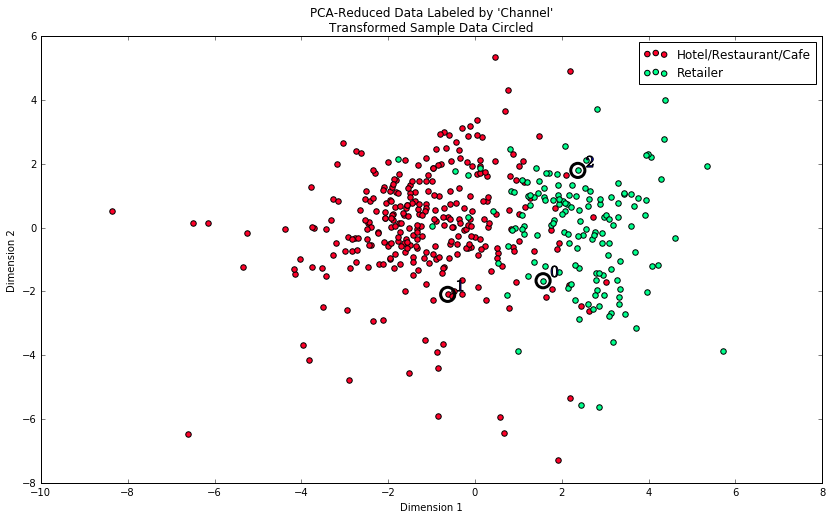

In [106]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

In [161]:
# Import original data
data_original = pd.read_csv("customers.csv")

# Get channel data
channel_data = list(data_original['Channel'])

# Transform channel labels so that they're consistent with cluster labels
transformed_channel = []

for x in channel_data:
    if (x == 2):
        transformed_channel.append(x - 2)
    else:
        transformed_channel.append(x)

# Transform cluster dataframe into list
labels_list = list(labels)

# Compare the two label lists
correct_count = 0
incorrect = []

for x in range(len(transformed_channel)):
    if transformed_channel[x] == labels_list[x]:
        correct_count += 1
    else:
        incorrect.append(transformed_channel[x])
    
accuracy = correct_count / len(labels_list)
print "Channel labels and Cluster labels match rate: {}".format(accuracy)
print "{} Retails are mislabelled as Horeca (segment 0), and {} Horeca mislabelled as Retails (segment 1)".format(Counter(incorrect)[1], Counter(incorrect)[0])

Channel labels and Cluster labels match rate: 0.890909090909
42 Retails are mislabelled as Horeca (segment 0), and 6 Horeca mislabelled as Retails (segment 1)


**Answer:** Comparing the channel labels and our clustering results, we can see that we have 89.09% matching accuracy. The clustering seems sufficiently consistent with the classifications. However, there indeed are customers that are labelled (by our clustering) incorrectly for both classes therefore there's no segment that is "pure".

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.